# Avaliação de Inteligência Artificial
## Ciência da Computação - UFFS/CHAPECÓ
##### Prof. Adriano Sanick Padilha

    Acadêmico(s):                                         Data: 21/06/2022                                
            


## Modelo Futuros Mini Ibovespa - Dados Históricos


O Mercado Futuro é o ambiente onde você pode ganhar com a alta ou baixa de um determinado ativo, seja ele uma commodity (Milho, Café, Boi Gordo), uma moeda (como o dólar), um Índice (Bovespa, Índice S&P 500) ou mesmo uma taxa de juros. Nele, são negociados contratos futuros.

<br><img src="grafico.jpeg"><br>

O mini índice é um contrato futuro derivado do Índice Bovespa, ou seja, é um ativo que tem como base o sobe e desce desse índice. Como esse tipo de operação envolve **risco considerável** e **oscilações frequentes no mercado**, ela é indicada apenas para aqueles que se encaixam no perfil de investidor arrojado.

**Neste trabalho, você deve implementar uma rede neural *Multi Layer Perceptron* para encontrar os pontos de compra e venda do Mini Índice da Ibovespa no intraday.** 

O dataset **"FuturosMiniBovespa.csv"** possui informações dispostas em colunas :

* **Date**:  Data das operações na bolsa (diária)
* **Close**:  Valor de Fechamento do Índice da Ibovespa (no dia)
* **Open**:  Valor da Abertura do Índice da Ibovespa (no dia)
* **High**:  Valor máximo do Índice da Ibovespa (no dia)
* **Low**:  Valor mínimo do Índice da Ibovespa (no dia)
* **Vol**:  Volume de contratos negociados (no dia)


### Avaliação

A avaliação será realizada em duas partes: 
* primeira parte: O código entregue no moodle até o dia 24/06.
* segunda parte:  Apresentação da solução no dia 28/06. 




### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo FuturosMiniBovespa.csv em um dataframe do pandas, mas antes vamos dar uma olhadinha no gráfico diário do índice Ibovespa.

In [2]:
df=pd.read_csv('FuturosMiniBovespaAvaliacao - Entradas (1).csv', delimiter = ',', decimal = ',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19985 entries, 0 to 19984
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data                                           19985 non-null  object 
 1   Abertura                                       19985 non-null  float64
 2   Máxima                                         19985 non-null  float64
 3   Mínima                                         19985 non-null  float64
 4   Fechamento                                     19985 non-null  float64
 5   Volume Quantidade                              19985 non-null  int64  
 6   Contador de Candles                            19985 non-null  int64  
 7   Prior Cote Ajuste                              19985 non-null  int64  
 8   Padilha [50 8 70 30 0.70 0.30]                 19985 non-null  float64
 9   PadilhaRetracoes [23.80 38.20 50 61.80 76.20]  199

In [4]:
#df['Data'] = pd.to_datetime(df['Data'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19985 entries, 0 to 19984
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data                                           19985 non-null  object 
 1   Abertura                                       19985 non-null  float64
 2   Máxima                                         19985 non-null  float64
 3   Mínima                                         19985 non-null  float64
 4   Fechamento                                     19985 non-null  float64
 5   Volume Quantidade                              19985 non-null  int64  
 6   Contador de Candles                            19985 non-null  int64  
 7   Prior Cote Ajuste                              19985 non-null  int64  
 8   Padilha [50 8 70 30 0.70 0.30]                 19985 non-null  float64
 9   PadilhaRetracoes [23.80 38.20 50 61.80 76.20]  199

In [6]:
df.describe()

,Abertura,Máxima,Mínima,Fechamento,Volume Quantidade,Contador de Candles,Prior Cote Ajuste,Padilha [50 8 70 30 0.70 0.30],PadilhaRetracoes [23.80 38.20 50 61.80 76.20],PadilhaVolatilidade [50 Close],IFR (RSI) Estocástico,IFR (RSI) [8]
count,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.00000,19985.000000
mean,110216.110602,110260.828499,110170.574989,110215.618738,30570.136052,266.881561,108362.184288,110230.456074,45.700521,171.823177,0.50146,49.521647
std,3752.734785,3746.604030,3758.881237,3752.977118,18782.912082,154.074114,3099.654156,3735.062443,30.456047,180.450333,0.32261,15.729453
min,100215.000000,100330.000000,100175.000000,100210.000000,1377.000000,1.000000,101679.000000,100696.400000,0.000000,0.000000,0.00000,2.000000
25%,108027.930000,108078.970000,107971.800000,108027.930000,17622.000000,134.000000,106266.000000,108056.080000,17.460000,52.420000,0.21000,38.690000
50%,110676.580000,110722.510000,110630.650000,110676.580000,26539.000000,265.000000,108821.000000,110671.400000,41.810000,116.970000,0.50000,49.530000
75%,113447.700000,113478.320000,113406.880000,113442.600000,38946.000000,400.000000,111252.000000,113440.220000,73.390000,225.650000,0.80000,60.430000
max,115999.380000,116030.000000,115958.560000,115994.280000,188465.000000,535.000000,112700.000000,115657.770000,100.000000,2277.580000,1.00000,98.160000


In [7]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechamento,Volume Quantidade,Contador de Candles,Prior Cote Ajuste,Padilha [50 8 70 30 0.70 0.30],PadilhaRetracoes [23.80 38.20 50 61.80 76.20],PadilhaVolatilidade [50 Close],IFR (RSI) Estocástico,IFR (RSI) [8]
0,21/06/2022 13:21,101775.0,101775.0,101745.0,101760.0,18867,262,101679,101828.74,16.97,73.54,0.56,47.38
1,21/06/2022 13:20,101840.0,101845.0,101760.0,101775.0,22780,261,101679,101831.54,18.45,56.54,0.79,51.01
2,21/06/2022 13:19,101815.0,101845.0,101775.0,101835.0,23744,260,101679,101833.85,22.88,1.15,0.98,63.83
3,21/06/2022 13:18,101820.0,101860.0,101810.0,101815.0,27034,259,101679,101833.81,21.40,18.81,0.93,60.97
4,21/06/2022 13:17,101785.0,101835.0,101780.0,101820.0,21388,258,101679,101834.57,21.77,14.57,0.81,62.05


In [8]:
df['Data']

0        21/06/2022 13:21
1        21/06/2022 13:20
2        21/06/2022 13:19
3        21/06/2022 13:18
4        21/06/2022 13:17
               ...       
19980    28/04/2022 10:09
19981    28/04/2022 10:08
19982    28/04/2022 10:07
19983    28/04/2022 10:06
19984    28/04/2022 10:05
Name: Data, Length: 19985, dtype: object

In [9]:
from datetime import datetime
datas = []

for date in df['Data']:
    data = datetime.strptime(date, '%d/%m/%Y %H:%M').date()
    datas.append(data)

df['Dia'] = datas

In [10]:
df.columns

Index(['Data', 'Abertura', 'Máxima', 'Mínima', 'Fechamento',
       'Volume Quantidade', 'Contador de Candles', 'Prior Cote Ajuste',
       'Padilha [50 8 70 30 0.70 0.30]',
       'PadilhaRetracoes [23.80 38.20 50 61.80 76.20]',
       'PadilhaVolatilidade [50 Close]', 'IFR (RSI) Estocástico',
       'IFR (RSI) [8]', 'Dia'],
      dtype='object')

In [11]:
#df['Dia'] = df['Data'].dt.date

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19985 entries, 0 to 19984
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data                                           19985 non-null  object 
 1   Abertura                                       19985 non-null  float64
 2   Máxima                                         19985 non-null  float64
 3   Mínima                                         19985 non-null  float64
 4   Fechamento                                     19985 non-null  float64
 5   Volume Quantidade                              19985 non-null  int64  
 6   Contador de Candles                            19985 non-null  int64  
 7   Prior Cote Ajuste                              19985 non-null  int64  
 8   Padilha [50 8 70 30 0.70 0.30]                 19985 non-null  float64
 9   PadilhaRetracoes [23.80 38.20 50 61.80 76.20]  199

In [13]:
# fig = go.Figure(data=[go.Candlestick(x=df['Dia'],
#                 open=df['Abertura'], high=df['Máxima'],
#                  low=df['Mínima'], close=df['Fechamento'])
#                      ])
# fig.update_layout(xaxis_rangeslider_visible=False)  
# fig.show()



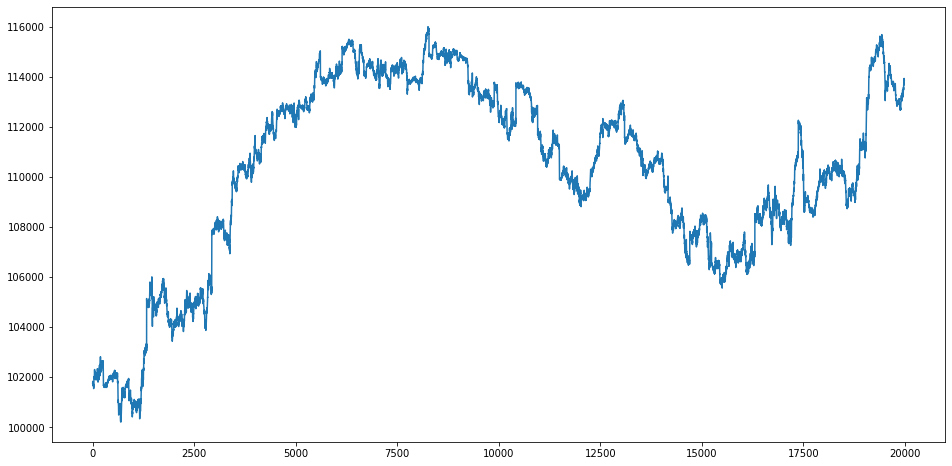

In [14]:
plt.figure (figsize = (16,8))
plt.plot (df ['Fechamento'], label = 'Fechar histórico de preços')

In [15]:
output = pd.read_csv('FuturosMiniBovespaAvaliacao - Saídas (Topos_Fundos 8 ).csv', decimal = ',')
output.notnull().sum()

Data                              19908
Detector de Topos e Fundos [8]      399
dtype: int64

In [16]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data                            19908 non-null  object 
 1   Detector de Topos e Fundos [8]  399 non-null    float64
dtypes: float64(1), object(1)
memory usage: 311.2+ KB


In [17]:
output = output.drop(['Data'], axis = 1)

In [18]:
output['Detector de Topos e Fundos [8]'].notnull().sum()

399

In [19]:
df['Detector de topos e fundos'] = output

In [20]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechamento,Volume Quantidade,Contador de Candles,Prior Cote Ajuste,Padilha [50 8 70 30 0.70 0.30],PadilhaRetracoes [23.80 38.20 50 61.80 76.20],PadilhaVolatilidade [50 Close],IFR (RSI) Estocástico,IFR (RSI) [8],Dia,Detector de topos e fundos
0,21/06/2022 13:21,101775.0,101775.0,101745.0,101760.0,18867,262,101679,101828.74,16.97,73.54,0.56,47.38,2022-06-21,NaN
1,21/06/2022 13:20,101840.0,101845.0,101760.0,101775.0,22780,261,101679,101831.54,18.45,56.54,0.79,51.01,2022-06-21,NaN
2,21/06/2022 13:19,101815.0,101845.0,101775.0,101835.0,23744,260,101679,101833.85,22.88,1.15,0.98,63.83,2022-06-21,NaN
3,21/06/2022 13:18,101820.0,101860.0,101810.0,101815.0,27034,259,101679,101833.81,21.40,18.81,0.93,60.97,2022-06-21,NaN
4,21/06/2022 13:17,101785.0,101835.0,101780.0,101820.0,21388,258,101679,101834.57,21.77,14.57,0.81,62.05,2022-06-21,NaN


In [21]:
topos_fundos_indexes = df.loc[df['Detector de topos e fundos'].notnull()].index

In [22]:
#df.loc[topos_fundos_indexes, ['Fechamento', 'Mínima','Detector de topos e fundos']]
mins_index = df.loc[topos_fundos_indexes, :].loc[df['Mínima'] == df['Detector de topos e fundos']].index
maxs_index = df.loc[topos_fundos_indexes, :].loc[df['Máxima'] == df['Detector de topos e fundos']].index



In [23]:
maxs_index

Int64Index([   46,   117,   140,   168,   191,   235,   455,   543,   559,
              598,
            ...
            18716, 18825, 18977, 19188, 19250, 19301, 19383, 19422, 19611,
            19862],
           dtype='int64', length=199)

In [24]:
buy = []
sell = []
index = 0
for index in range(len(df)):
    if index in mins_index:
        buy.append(1)
        sell.append(0)
    elif index in maxs_index:
        buy.append(0)
        sell.append(1)
    else:
        buy.append(0)
        sell.append(0)

        
df['Buy'] = buy
df['Sell'] = sell

In [25]:
df

,Data,Abertura,Máxima,Mínima,Fechamento,Volume Quantidade,Contador de Candles,Prior Cote Ajuste,Padilha [50 8 70 30 0.70 0.30],PadilhaRetracoes [23.80 38.20 50 61.80 76.20],PadilhaVolatilidade [50 Close],IFR (RSI) Estocástico,IFR (RSI) [8],Dia,Detector de topos e fundos,Buy,Sell
0,21/06/2022 13:21,101775.00,101775.00,101745.00,101760.00,18867,262,101679,101828.74,16.97,73.54,0.56,47.38,2022-06-21,NaN,0,0
1,21/06/2022 13:20,101840.00,101845.00,101760.00,101775.00,22780,261,101679,101831.54,18.45,56.54,0.79,51.01,2022-06-21,NaN,0,0
2,21/06/2022 13:19,101815.00,101845.00,101775.00,101835.00,23744,260,101679,101833.85,22.88,1.15,0.98,63.83,2022-06-21,NaN,0,0
3,21/06/2022 13:18,101820.00,101860.00,101810.00,101815.00,27034,259,101679,101833.81,21.40,18.81,0.93,60.97,2022-06-21,NaN,0,0
4,21/06/2022 13:17,101785.00,101835.00,101780.00,101820.00,21388,258,101679,101834.57,21.77,14.57,0.81,62.05,2022-06-21,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19980,28/04/2022 10:09,113917.21,113932.52,113835.56,113927.42,30886,70,110917,113926.93,16.43,0.49,0.73,56.74,2022-04-28,NaN,0,0
19981,28/04/2022 10:08,113901.90,113952.94,113830.45,113917.21,38705,69,110917,113926.91,15.00,9.70,0.71,54.66,2022-04-28,NaN,0,0
19982,28/04/2022 10:07,113917.21,113952.94,113861.07,113901.90,19005,68,110917,113927.31,12.86,25.41,0.60,51.59,2022-04-28,NaN,0,0
19983,28/04/2022 10:06,113861.07,113958.04,113840.66,113917.21,27907,67,110917,113928.35,15.00,11.13,0.53,54.84,2022-04-28,NaN,0,0


In [26]:
df.columns

Index(['Data', 'Abertura', 'Máxima', 'Mínima', 'Fechamento',
       'Volume Quantidade', 'Contador de Candles', 'Prior Cote Ajuste',
       'Padilha [50 8 70 30 0.70 0.30]',
       'PadilhaRetracoes [23.80 38.20 50 61.80 76.20]',
       'PadilhaVolatilidade [50 Close]', 'IFR (RSI) Estocástico',
       'IFR (RSI) [8]', 'Dia', 'Detector de topos e fundos', 'Buy', 'Sell'],
      dtype='object')

In [27]:
df = df.drop(['Data', 'Dia','Detector de topos e fundos', 'Contador de Candles', 'IFR (RSI) Estocástico',
              'PadilhaVolatilidade [50 Close]', 'PadilhaRetracoes [23.80 38.20 50 61.80 76.20]',
             'Padilha [50 8 70 30 0.70 0.30]'], axis = 1)

# Rede Neural Multicamadas (MPL)
Uma rede MPL é uma classe de rede neural artificial *feedforward* (ANN). Um MLP consiste em pelo menos três camadas de nós: uma camada de entrada , uma camada oculta e uma camada de saída . Exceto para os nós de entrada, cada nó é um neurônio que usa uma função de ativação não linear . O MPL utiliza uma técnica de aprendizado supervisionado chamada *backpropagation* para treinamento.



### Implementando uma RNA multicamadas

A imagem a seguir mostra a nossa rede, com as unidades de entrada marcadas como Input1, Input2 e Input3 (**Input Layer**) conectadas com os *nós* da camada oculta (**Hidden Layer**). Por sua vez as saída dos *nós* da camada oculda servem como entrada para os *nós*  da camada de saída (**Output Layer**). <img src='MPL.png' /><br>

<p style="text-align:center">  <i> Diagrama de uma MPL</i> </p>
 

Lembrando que em cada *nó* temos: 

$$f(h) = sigmoid(h)=\frac 1 {1+e^{-h}}$$  

onde

<p style="text-align:center"> $$h = \frac 1n\sum_{i=1}^n(w_i*x_i)+b$$  </p>


# Normalizando os dados

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfScaled = scaler.fit_transform(df)
dfScaled = pd.DataFrame(np.array(dfScaled), columns = df.columns)

In [30]:
X = dfScaled.drop(['Buy', 'Sell'],axis=1)
y = df[['Buy', 'Sell']]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Criando o modelo de MPL

In [32]:
dfScaled.columns

Index(['Abertura', 'Máxima', 'Mínima', 'Fechamento', 'Volume Quantidade',
       'Prior Cote Ajuste', 'IFR (RSI) [8]', 'Buy', 'Sell'],
      dtype='object')

In [33]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 7
N_hidden = 3
N_output = 2
learnrate = 0.1

In [34]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.03472949 -0.07750946 -0.04117471]
 [-0.11283657  0.01724373  0.05991293]
 [-0.16587153 -0.01358488 -0.01880678]
 [ 0.04217734 -0.02646569  0.14800351]
 [-0.14146848 -0.19590667 -0.00787377]
 [ 0.05532284  0.04941978  0.04655219]
 [ 0.1438934  -0.05458292 -0.05144435]]
Pesos da Camada de Saída:
[[ 1.20866111e-01 -2.57961441e-02]
 [ 1.33843414e-01  6.67541638e-02]
 [ 5.59652417e-06 -8.42763775e-02]]


In [ ]:
epochs = 10000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.011362761381374079
Erro quadrático no treinamento:  0.00500833730719796
Erro quadrático no treinamento:  0.0032614669911951483


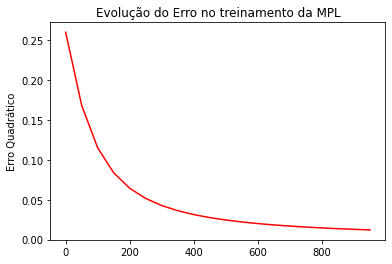

In [38]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

In [40]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        print(output)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
#         if (output[0]>output[1]):
#             if (yi[0]>yi[1]):
#                 predictions+=1
                
#         if (output[1]>=output[0]):
#             if (yi[1]>yi[0]):
#                 predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))

[0.10350666 0.10306567]
[0.10706532 0.10649582]
[0.10033998 0.09942499]
[0.11348818 0.11298153]
[0.1069685  0.10643807]
[0.09940792 0.09887436]
[0.11008739 0.10971226]
[0.10310992 0.10278665]
[0.09454422 0.09408619]
[0.09465441 0.09412983]
[0.09416267 0.09376401]
[0.10283839 0.10213892]
[0.10334141 0.1026767 ]
[0.10386055 0.10333903]
[0.09497228 0.09437695]
[0.0972649  0.09694097]
[0.09130732 0.09050589]
[0.09917273 0.09853951]
[0.09957518 0.09934373]
[0.09472991 0.09360854]
[0.09281493 0.09187312]
[0.09844227 0.09791178]
[0.11624302 0.11541667]
[0.11222899 0.11158289]
[0.09323547 0.09253748]
[0.10156802 0.10076841]
[0.09496326 0.09404164]
[0.09465998 0.09418804]
[0.12962632 0.12865518]
[0.10842962 0.10793728]
[0.09374847 0.09280384]
[0.1030544 0.1027503]
[0.0945192  0.09406328]
[0.09720336 0.0969052 ]
[0.1019243  0.10160219]
[0.10288791 0.10228873]
[0.11889909 0.11809404]
[0.11623015 0.11585532]
[0.09293558 0.09218393]
[0.1142307  0.11401187]
[0.10216701 0.10143615]
[0.13115142 0.1304

[0.09275342 0.0920969 ]
[0.1006142  0.10018253]
[0.09752389 0.09687821]
[0.10542221 0.10485896]
[0.10005788 0.09934424]
[0.09565978 0.09537526]
[0.0918282  0.09150963]
[0.10268564 0.10193093]
[0.09508677 0.09461824]
[0.09809524 0.09776809]
[0.10732251 0.10704253]
[0.12001228 0.1197554 ]
[0.09900115 0.09866406]
[0.10663394 0.1065577 ]
[0.10133572 0.10097411]
[0.10034679 0.10001267]
[0.0916813  0.09112859]
[0.09903369 0.09888101]
[0.12090397 0.12075971]
[0.1032447  0.10309095]
[0.1258818  0.12549111]
[0.09311271 0.09275008]
[0.10739142 0.10648999]
[0.10634851 0.10594222]
[0.0958801  0.09534065]
[0.08893419 0.08845344]
[0.09294698 0.0924728 ]
[0.09375922 0.09330914]
[0.09166423 0.09084683]
[0.10694146 0.10698101]
[0.09570415 0.09490752]
[0.09134416 0.09058013]
[0.10942957 0.10938019]
[0.09908352 0.0986537 ]
[0.10012571 0.09963375]
[0.1250199 0.124372 ]
[0.09658828 0.09631491]
[0.09626539 0.09568589]
[0.09639954 0.09606943]
[0.09754735 0.09752015]
[0.09712439 0.09625563]
[0.08942685 0.0884

[0.14664158 0.14551498]
[0.09522739 0.09431961]
[0.10390734 0.10348986]
[0.10150599 0.10084676]
[0.09566056 0.09515822]
[0.09551809 0.09511218]
[0.13120248 0.13047583]
[0.10099817 0.10078304]
[0.10081637 0.10038562]
[0.13027618 0.12982709]
[0.09631837 0.09606249]
[0.1127033  0.11261463]
[0.09715269 0.09687014]
[0.10706501 0.10637204]
[0.10237837 0.10171919]
[0.10243365 0.10185387]
[0.09209084 0.09185674]
[0.09871602 0.09859473]
[0.09671984 0.09635949]
[0.09988169 0.09932812]
[0.11418357 0.11392224]
[0.09821829 0.09779075]
[0.1117804  0.11130649]
[0.09482766 0.09408014]
[0.11750016 0.11691391]
[0.09250833 0.09190576]
[0.10638994 0.10548674]
[0.09944714 0.09920388]
[0.10675547 0.10636409]
[0.09833692 0.09783928]
[0.10620736 0.10542347]
[0.10362991 0.10322448]
[0.09763877 0.09671526]
[0.10601105 0.10549339]
[0.10593746 0.10559623]
[0.09456402 0.09409176]
[0.1090303  0.10830231]
[0.10491908 0.10429445]
[0.09403428 0.09319892]
[0.0965293  0.09607844]
[0.0931204  0.09273774]
[0.10911423 0.10

## Comece o seu projeto aqui

Vamos começar lendo o arquivo do link https://docs.google.com/spreadsheets/d/1KgTBfzQBxAidAB5Il_cyH9BaudcINcc9Ir6rT2w1OZM/edit?usp=sharing e carregando em dataframe do pandas.